https://tcoil.info/compute-rsi-for-stocks-with-python-relative-strength-index/ 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/window.html#window-exponentially-weighted

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important;}</style>"))
#__library_import_statements__
import pandas as pd

#for pandas_datareader, otherwise it might have issues 
pd.core.common.is_list_like = pd.api.types.is_list_like

#make pandas print to dataframes 
pd.set_option('expand_frame_repr', False)

import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import time

#using newest yahoo api
import yfinance as yahoo_finance

#yahoo_finance.pdr_override()

%matplotlib inline

In [2]:
# ___variables___
ticker = 'AAPL'
#ticker = 'TSLA'
#ticker = 'FB'
#ticker = 'MSFT'
#ticker = 'NFLX'
#ticker = 'GOOGL'
#ticker = 'BIDU'
#ticker = 'AMZN'


start_time = datetime.datetime(2018, 1, 1)
#end_time = datetime.datetime(2019, 1, 20)
end_time = datetime.datetime.now().date().isoformat()         # today

In [3]:
import yfinance as yf
data = yf.download(ticker, start="2021-03-01", end="2021-06-30")
print (data)
data.reset_index()
df = data

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close     Volume
Date                                                                             
2021-03-01  123.750000  127.930000  122.790001  127.790001  127.573311  116307900
2021-03-02  128.410004  128.720001  125.010002  125.120003  124.907837  102260900
2021-03-03  124.809998  125.709999  121.839996  122.059998  121.853020  112966300
2021-03-04  121.750000  123.599998  118.620003  120.129997  119.926292  178155000
2021-03-05  120.980003  121.940002  117.570000  121.419998  121.214104  153766600
...                ...         ...         ...         ...         ...        ...
2021-06-23  133.770004  134.320007  133.229996  133.699997  133.699997   60214200
2021-06-24  134.449997  134.639999  132.929993  133.410004  133.410004   68711000
2021-06-25  133.460007  133.889999  132.809998  133.110001  133.110001   70783700
2021-06-28  133.410004  135.2

In [4]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [5]:
df['RSI'] = computeRSI(df['Adj Close'], 14)


In [6]:
df=df.reset_index()
print(df.head())
print(df.tail())

        Date        Open        High         Low       Close   Adj Close     Volume  RSI
0 2021-03-01  123.750000  127.930000  122.790001  127.790001  127.573311  116307900  NaN
1 2021-03-02  128.410004  128.720001  125.010002  125.120003  124.907837  102260900  NaN
2 2021-03-03  124.809998  125.709999  121.839996  122.059998  121.853020  112966300  NaN
3 2021-03-04  121.750000  123.599998  118.620003  120.129997  119.926292  178155000  NaN
4 2021-03-05  120.980003  121.940002  117.570000  121.419998  121.214104  153766600  NaN
         Date        Open        High         Low       Close   Adj Close    Volume        RSI
80 2021-06-23  133.770004  134.320007  133.229996  133.699997  133.699997  60214200  64.585773
81 2021-06-24  134.449997  134.639999  132.929993  133.410004  133.410004  68711000  63.459412
82 2021-06-25  133.460007  133.889999  132.809998  133.110001  133.110001  70783700  62.249923
83 2021-06-28  133.410004  135.250000  133.350006  134.779999  134.779999  62111300  6

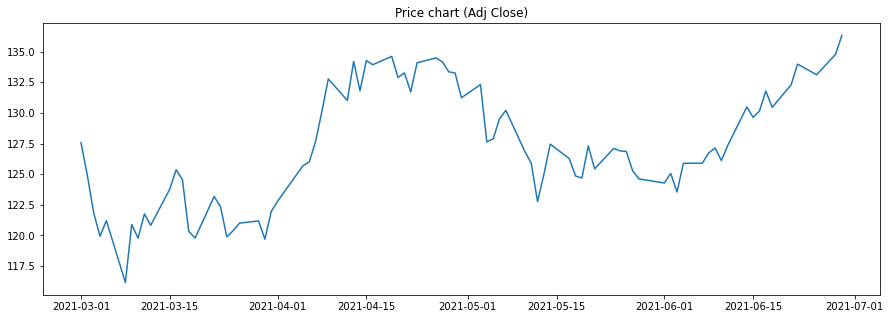

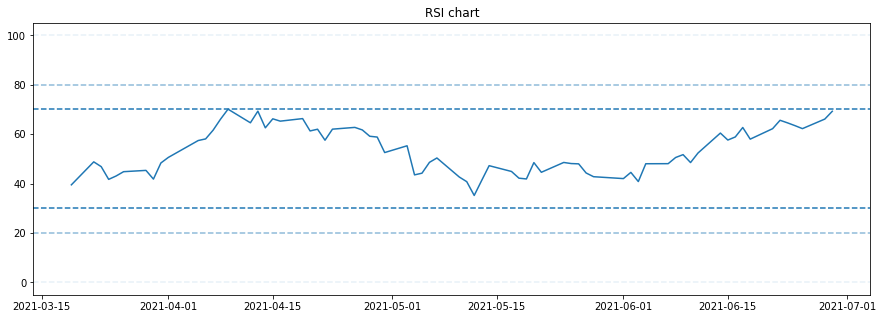

In [7]:
# plot price
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Adj Close'])
plt.title('Price chart (Adj Close)')
plt.show()


# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('RSI chart')
plt.plot(df['Date'], df['RSI'])

plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')

plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.show()